In [37]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [38]:
df = pd.read_csv('../../Datasets/class_exercise/Tractor-Sales.csv')

In [39]:
df.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [40]:
df.rename(columns={'Number of Tractor Sold': 'Target'}, inplace=True)

In [41]:
df.isnull().sum()

Month-Year    0
Target        0
dtype: int64

In [42]:
df.shape

(144, 2)

In [43]:
df.duplicated().sum()

0

In [44]:
df["Month-Year"].str.lower().value_counts()

Month-Year
jan-03    1
feb-03    1
sep-10    1
oct-10    1
nov-10    1
         ..
jan-07    1
feb-07    1
mar-07    1
apr-07    1
dec-14    1
Name: count, Length: 144, dtype: int64

In [45]:
df.dtypes

Month-Year    object
Target         int64
dtype: object

In [46]:
df['Month-Year'] = pd.to_datetime(df['Month-Year'], format="%b-%y")

In [47]:
df.dtypes

Month-Year    datetime64[ns]
Target                 int64
dtype: object

In [48]:
df['Month'] = df['Month-Year'].dt.month_name()
df['Year'] = df['Month-Year'].dt.year

In [49]:
df.head()

,Month-Year,Target,Month,Year
0,2003-01-01,141,January,2003
1,2003-02-01,157,February,2003
2,2003-03-01,185,March,2003
3,2003-04-01,199,April,2003
4,2003-05-01,203,May,2003


In [50]:
df['Month'].value_counts().index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='Month')

In [56]:
dt1=df.pivot_table(index="Year", columns="Month", values="Target", aggfunc="sum")
# rearranging from jan to dec
dt2=dt1[['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']]
dt2

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


<Axes: xlabel='Year'>

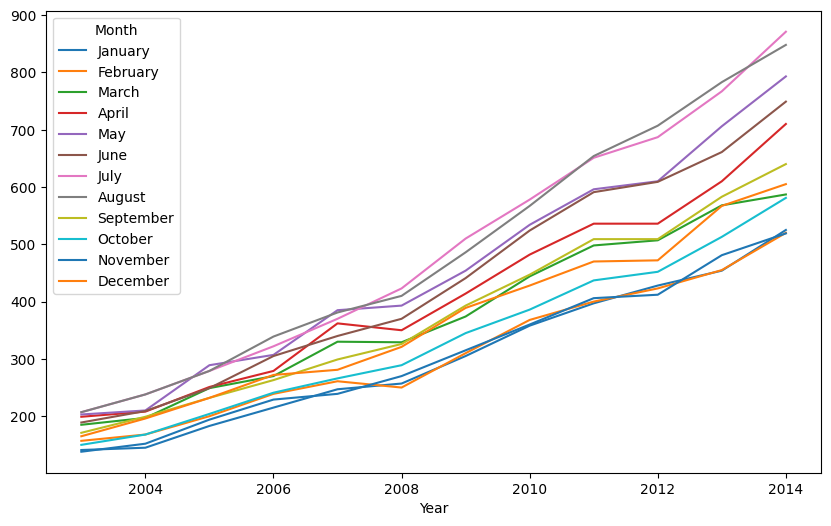

In [52]:
dt2.plot(kind="line", figsize=(10,6))

<Axes: xlabel='Month'>

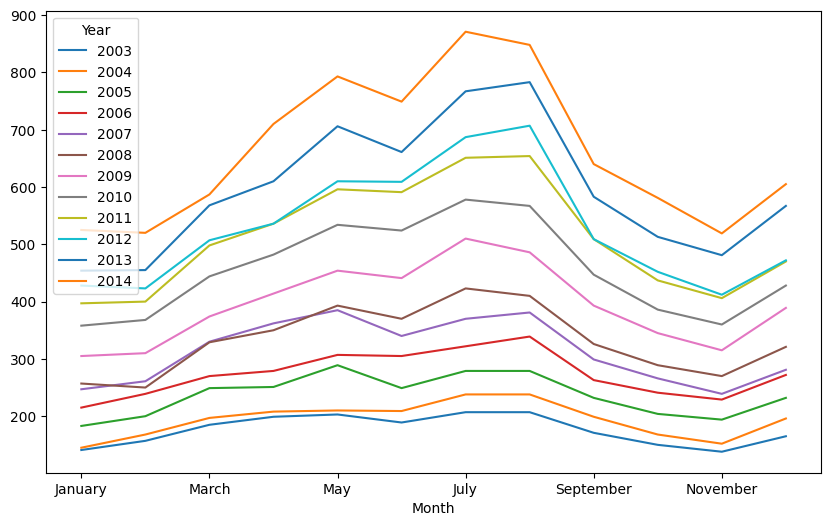

In [53]:
dt2.T.plot(kind="line", figsize=(10,6))

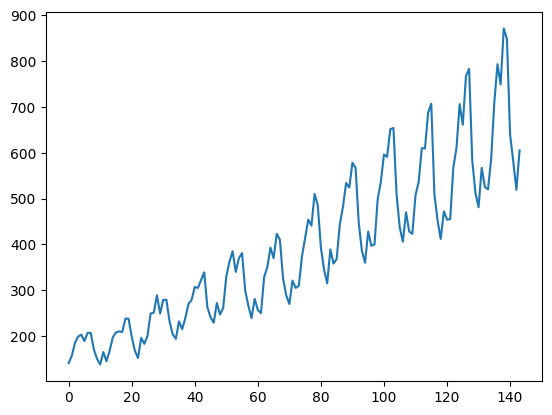

In [76]:
plt.plot(df['Target'])

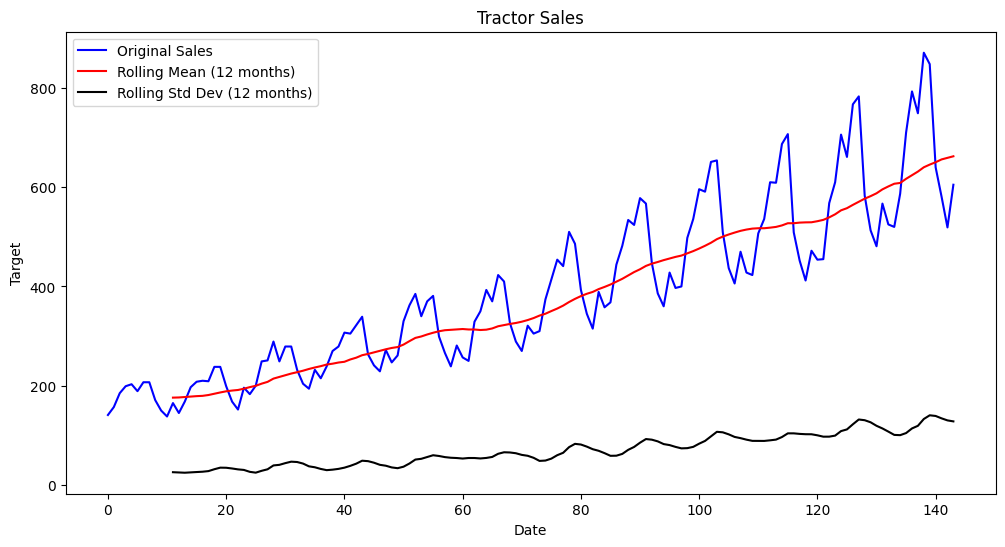

In [79]:
# Rolling Mean and Rolling Standard Deviation
rolling_mean = df['Target'].rolling(window=12).mean()
rolling_std = df['Target'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Target'], color='blue', label='Original Sales')
plt.plot(rolling_mean, color='red', label='Rolling Mean (12 months)')
plt.plot(rolling_std, color='black', label='Rolling Std Dev (12 months)')
plt.title("Tractor Sales")
plt.xlabel("Date")
plt.ylabel("Target")
plt.legend(loc='best')
plt.show()

For the target variable (tractor sold), the mean is increasing and it also has seasonality

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Target'])

# Extract test statistic and p-value
adf_statistic, p_value = result[0], result[1]

print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("The series is stationary")
else:
    print("The series is non-stationary")


ADF Statistic: 1.1088250591467386
p-value: 0.995291241524842
The series is non-stationary (fail to reject H₀)


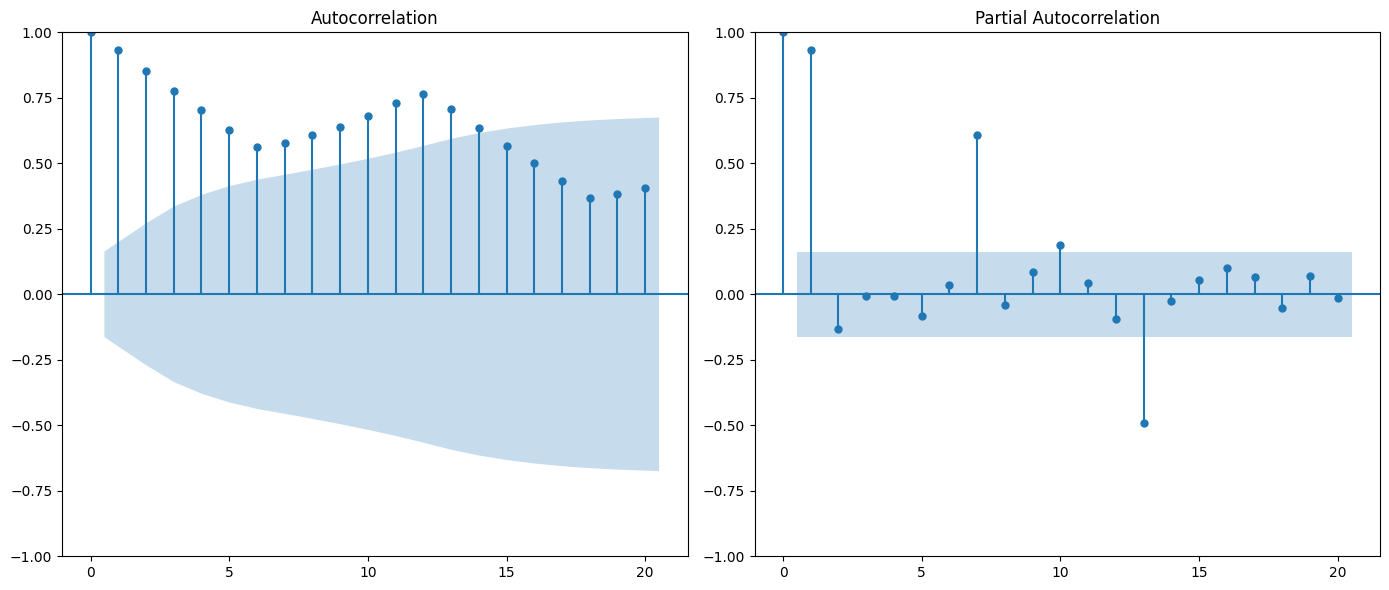

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(df['Target'], lags=20, ax=plt.gca())

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(df['Target'], lags=20, ax=plt.gca(), method='ywm')

plt.tight_layout()
plt.show()


In Time series forecasting we only use PACF as it only considers the direct effect of previous time lags and current time on target variable while ACF consider both direct effect and indirect effect of previous time lags on the current time target variable causing more co-relation.